In [1]:
import os
from random import random

import cv2
import numpy as np
import pandas as pd

import image_processor
import model_builder

from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split

from datetime import datetime

In [2]:
image_size = (64, 64)
input_size = (*image_size, 1)

In [3]:
df_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
            'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
            'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [4]:
train_generator, val_generator = image_processor.process_image_data_with_augmentation("data/Train", image_size, df_names)

Found 45198 images belonging to 62 classes.
Found 7974 images belonging to 62 classes.


In [5]:
model = model_builder.build_conv_pool_model(input_size, len(df_names))

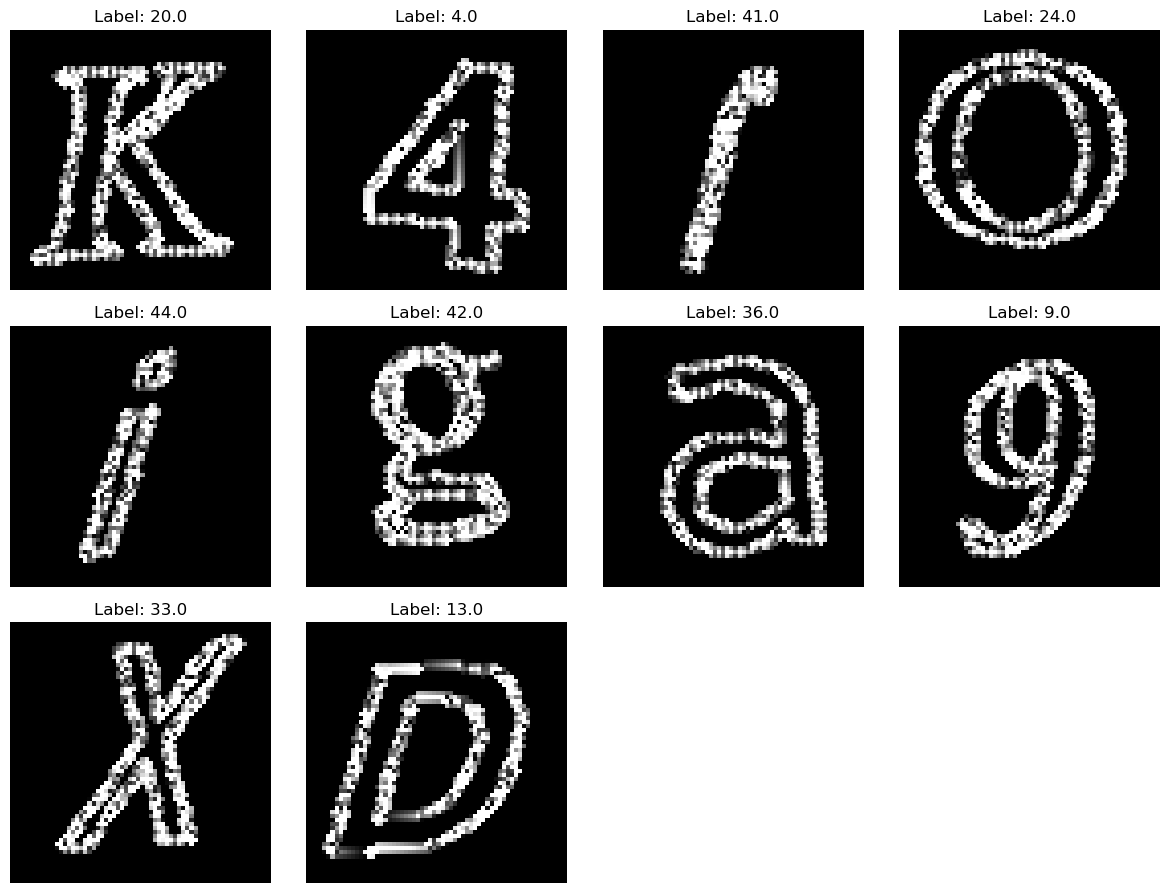

In [6]:
import matplotlib.pyplot as plt
# Retrieve a batch of images and labels
images, labels = next(train_generator)

# Display images
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(4, 4, i + 1)  # Create a grid of 4x4 images
    img = images[i]
    plt.imshow(img if img.shape[-1] == 3 else img.squeeze(), cmap='gray')  # Handle grayscale and RGB
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_generator,
                    epochs=50,
                    callbacks=[early_stopping, tensorboard_callback],
                    validation_data=val_generator,
                    verbose=1)

Epoch 1/50
354/354 [==============================] - 72s 201ms/step - loss: 3.3547 - accuracy: 0.6482 - val_loss: 6.5848 - val_accuracy: 0.0150
Epoch 2/50
354/354 [==============================] - 81s 227ms/step - loss: 0.9563 - accuracy: 0.7945 - val_loss: 1.2569 - val_accuracy: 0.6901
Epoch 3/50
354/354 [==============================] - 75s 211ms/step - loss: 0.8009 - accuracy: 0.8179 - val_loss: 0.9106 - val_accuracy: 0.7909
Epoch 4/50
354/354 [==============================] - 75s 211ms/step - loss: 0.7561 - accuracy: 0.8274 - val_loss: 0.9977 - val_accuracy: 0.7665
Epoch 5/50
354/354 [==============================] - 77s 218ms/step - loss: 0.7383 - accuracy: 0.8327 - val_loss: 0.6917 - val_accuracy: 0.8494
Epoch 6/50
354/354 [==============================] - 72s 204ms/step - loss: 0.7079 - accuracy: 0.8394 - val_loss: 0.8016 - val_accuracy: 0.8062
Epoch 7/50
354/354 [==============================] - 73s 206ms/step - loss: 0.6810 - accuracy: 0.8453 - val_loss: 0.7046 - val_ac

In [8]:
for epoch, (val_loss, val_acc) in enumerate(zip(history.history['val_loss'], history.history['val_accuracy']), start=1):
    print(f"Epoch {epoch}: val_loss={val_loss:.4f}, val_accuracy={val_acc:.4f}")

score = model.evaluate(val_generator, verbose=0)
print(f"Final Validation Accuracy: {score[1] * 100:.2f}%")

Epoch 1: val_loss=6.5848, val_accuracy=0.0150
Epoch 2: val_loss=1.2569, val_accuracy=0.6901
Epoch 3: val_loss=0.9106, val_accuracy=0.7909
Epoch 4: val_loss=0.9977, val_accuracy=0.7665
Epoch 5: val_loss=0.6917, val_accuracy=0.8494
Epoch 6: val_loss=0.8016, val_accuracy=0.8062
Epoch 7: val_loss=0.7046, val_accuracy=0.8332
Epoch 8: val_loss=0.7223, val_accuracy=0.8307
Epoch 9: val_loss=0.9041, val_accuracy=0.7819
Epoch 10: val_loss=0.6879, val_accuracy=0.8366
Epoch 11: val_loss=1.7649, val_accuracy=0.5751
Epoch 12: val_loss=1.8843, val_accuracy=0.5301
Epoch 13: val_loss=1.0301, val_accuracy=0.7556
Epoch 14: val_loss=0.9622, val_accuracy=0.7729
Epoch 15: val_loss=2.9940, val_accuracy=0.3770
Final Validation Accuracy: 83.57%


In [9]:
test_df, _ = image_processor.process_image_data_with_augmentation("data/TestData", image_size)

Found 7100 images belonging to 1 classes.


In [10]:
pred = model.predict(test_df)

222/222 [==============================] - 4s 17ms/step


In [11]:
pred

array([[2.0355170e-04, 3.7639484e-02, 2.9469552e-04, ..., 7.5980183e-04,
        6.4093369e-04, 2.3421831e-03],
       [1.3009630e-04, 2.6756842e-03, 1.4744900e-05, ..., 3.6148980e-04,
        1.0408111e-04, 4.5020255e-04],
       [4.0165070e-04, 1.5735844e-01, 2.5211493e-04, ..., 7.2374806e-04,
        8.3553116e-04, 3.2044230e-03],
       ...,
       [3.1573235e-04, 1.9014475e-05, 1.3360518e-05, ..., 2.0735143e-03,
        6.7691802e-04, 3.9699469e-03],
       [1.6339768e-03, 2.3274177e-05, 2.5745929e-05, ..., 1.1804856e-03,
        2.1119213e-03, 1.2014793e-03],
       [5.8853929e-03, 1.8773779e-04, 1.7165067e-04, ..., 1.3505293e-03,
        2.2275820e-03, 3.0138290e-03]], dtype=float32)

In [12]:
predicted_classes = pred.argmax(axis=1)
len(predicted_classes)

7100

In [14]:
filepaths = test_df.filepaths  # List of file paths
labels = test_df.classes       # Numeric labels
class_indices = test_df.class_indices  # Dictionary mapping class names to labels

# Convert labels to class names
label_names = {v: k for k, v in class_indices.items()}  # Reverse dictionary
class_names = [label_names[label] for label in labels]

In [15]:
df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels,
    'class_name': class_names
})

In [17]:
images, labels = next(train_generator)

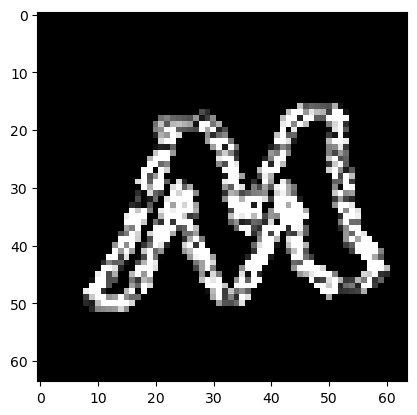

In [25]:
plt.imshow(images[4].reshape(*image_size), cmap='gray')

In [ ]:
plt.show()

In [21]:
df['pred'] = predicted_classes

In [23]:
df

,filepath,label,class_name,pred
0,data/TestData/test/Test0001.png,0,test,47
1,data/TestData/test/Test0002.png,0,test,18
2,data/TestData/test/Test0003.png,0,test,47
3,data/TestData/test/Test0004.png,0,test,18
4,data/TestData/test/Test0005.png,0,test,47
...,...,...,...,...
7095,data/TestData/test/Test7096.png,0,test,52
7096,data/TestData/test/Test7097.png,0,test,27
7097,data/TestData/test/Test7098.png,0,test,32
7098,data/TestData/test/Test7099.png,0,test,22


In [22]:
predicted_labels = [df_names[i] for i in predicted_classes]

predicted_labels

['l',
 'I',
 'l',
 'I',
 'l',
 'l',
 'l',
 'l',
 '1',
 'I',
 'l',
 'r',
 '7',
 'l',
 'l',
 't',
 'T',
 'L',
 'I',
 'l',
 'L',
 't',
 'l',
 'l',
 'L',
 'L',
 't',
 't',
 'l',
 't',
 't',
 'l',
 'I',
 'I',
 '1',
 '1',
 '1',
 't',
 'r',
 'I',
 'I',
 'l',
 'l',
 'l',
 'L',
 'L',
 'l',
 'l',
 'I',
 'r',
 'L',
 'I',
 't',
 'l',
 'I',
 'I',
 'r',
 'r',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'h',
 'L',
 'r',
 'I',
 'r',
 'r',
 'r',
 'r',
 'I',
 'r',
 't',
 'r',
 'r',
 'I',
 'l',
 'L',
 'L',
 'r',
 'l',
 'h',
 'I',
 'h',
 'I',
 'I',
 'I',
 'r',
 'I',
 'l',
 'l',
 'I',
 'I',
 'I',
 'r',
 'r',
 'r',
 't',
 'r',
 'r',
 'I',
 'I',
 'h',
 'I',
 'L',
 'I',
 'L',
 'L',
 'L',
 'L',
 'L',
 'r',
 'l',
 'l',
 'I',
 '1',
 'I',
 'I',
 't',
 't',
 'r',
 'F',
 'Z',
 'l',
 'l',
 't',
 'r',
 'F',
 'L',
 '1',
 '1',
 'l',
 'l',
 'l',
 'h',
 't',
 'l',
 'F',
 'I',
 'L',
 'l',
 'L',
 'I',
 'l',
 'i',
 'h',
 'I',
 'l',
 'l',
 'T',
 'I',
 'L',
 '1',
 'l',
 '1',
 'l',
 'L',
 'L',
 'l',
 'L',
 'L',
 'I',
 'l',
 'l'

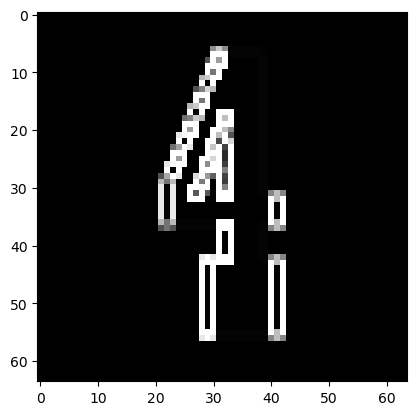

In [31]:
import matplotlib.pyplot as plt
images, labels = next(test_df)

plt.imshow(images[16].reshape(*image_size), cmap='gray')
plt.show()

In [26]:
filtered_df = test_df[test_df['pred'] == 'l']
test_df[['label', 'pred']]

,label,pred
0,Test4751.png,g
1,Test2320.png,x
2,Test4989.png,N
3,Test6146.png,s
4,Test1629.png,x
...,...,...
7095,Test2339.png,P
7096,Test4990.png,N
7097,Test5456.png,g
7098,Test4748.png,0


In [38]:
df_lead = test_df[['pred', 'label']].sort_values(by=['label'], ascending=True).reset_index(drop=True)

In [39]:
df_lead.columns = ['class', 'TestImage']

In [40]:
df_lead

,class,TestImage
0,19,Test0001.png
1,19,Test0002.png
2,45,Test0003.png
3,45,Test0004.png
4,45,Test0005.png
...,...,...
7095,31,Test7096.png
7096,12,Test7097.png
7097,23,Test7098.png
7098,33,Test7099.png


In [43]:
df_lead.to_csv("vegleges_adat.csv", index=False, sep=';')